<h1>10 YR vs 2 YR Treausry Yield from Nasdaq Data Link</h1>

In [1]:
import urllib.request, json
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

link='https://data.nasdaq.com/api/v3/datasets/USTREASURY/YIELD.json?api_key=gkN5YxUCRtxzcNzfKXTW'

with urllib.request.urlopen(link) as url:
    data = json.loads(url.read().decode())

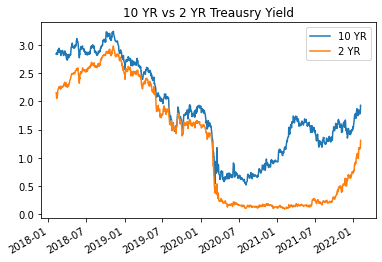

In [2]:
date=[datetime.strptime(i[0],'%Y-%m-%d') for i in data['dataset']['data']]
T_yield=[]

for j in range(len(data['dataset']['column_names'][1:])):
    T_yield.append([i[j+1] for i in data['dataset']['data']])

df=pd.DataFrame(T_yield, columns=date, index=data['dataset']['column_names'][1:]).transpose()
df_30=df[:1000]
ten_yr=df_30['10 YR']
two_yr=df_30['2 YR']
ten_yr.plot()
two_yr.plot()
plt.legend()
plt.title('10 YR vs 2 YR Treausry Yield')
plt.show()

<h1>10 YR vs 2 YR Treausry Yield from CSV</h1>

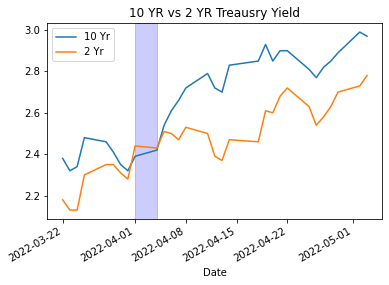

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

yield_csv=pd.read_csv('daily-treasury-rates.csv').set_index('Date')
yield_csv.index=pd.to_datetime(yield_csv.index)
yield_csv_30=yield_csv[:30]
ten_yr=yield_csv_30['10 Yr']
two_yr=yield_csv_30['2 Yr']
ten_yr.plot()
two_yr.plot()
plt.axvspan('2022-04-01', '2022-04-04', color='blue', alpha=0.2)
plt.legend()
plt.title('10 YR vs 2 YR Treausry Yield')
plt.show()


<h1>10 YR vs 2 YR Treausry Yield from Treasury.gov XML</h1>

In [2]:
import requests
import xmltodict
import pandas as pd
import matplotlib.pyplot as plt


url='https://home.treasury.gov/resource-center/data-chart-center/interest-rates/pages/xml?data=daily_treasury_yield_curve&field_tdr_date_value=2022'
response=requests.get(url)
data=xmltodict.parse(response.content)


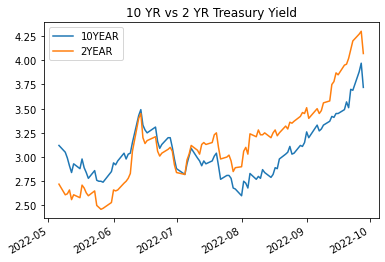

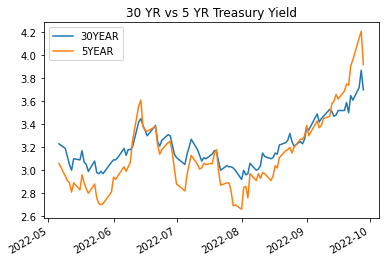

In [3]:
yield_data=[]

yield_date=pd.to_datetime([i['content']['m:properties']['d:NEW_DATE']['#text'] for i in data['feed']['entry']])
col=[i.replace('d:BC_','') for i in data['feed']['entry'][0]['content']['m:properties']]

for j in range(len(data['feed']['entry'])):
    yield_data.append([data['feed']['entry'][j]['content']['m:properties'][i]['#text'] for i in data['feed']['entry'][j]['content']['m:properties']])

df=pd.DataFrame(yield_data, index=yield_date, columns=col)
df_30=df[-100:]
ten_yr=df_30['10YEAR'].astype(float)
two_yr=df_30['2YEAR'].astype(float)
ten_yr.plot()
two_yr.plot()
plt.legend()
plt.title('10 YR vs 2 YR Treasury Yield')
plt.show()

thirty_yr=df_30['30YEAR'].astype(float)
five_yr=df_30['5YEAR'].astype(float)
thirty_yr.plot()
five_yr.plot()
plt.legend()
plt.title('30 YR vs 5 YR Treasury Yield')
plt.show()